In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.coordinates import SkyCoord
import astropy.units as u

#### Edit a result csv file from query (Galaxy_counter.ipynb) 
Description: Starting below, it finds the duplicates of object names (MAIN_ID). It keeps the first appearance of each objects and drops the rest.

Next, it drops objects that do not meet the criteria we set. (abs magnitude at the moment). At the end, it saves the edited file as a new csv file

In [38]:
t = pd.read_csv("result_hina_10.0.csv") # Read a csv file to be edited
print("the file contains", len(t), "objects")

the file contains 717539 objects


In [39]:
t

,MAIN_ID,Z_VALUE,FLUX_g,FLUX_B,RA_d,DEC_d,SCRIPT_NUMBER_ID,mag,abs_mag,separation,color,UDG id
0,UGC 76,0.015281,15.99500,16.0,2.205180,24.540114,0,15.995000,-18.131331,9.671281,0.278,SMDG0000017+325141
1,UGC 244,0.015134,14.84500,14.9,6.375150,24.811361,0,14.845000,-19.260095,10.979285,0.278,SMDG0000017+325141
2,LEDA 141431,0.015671,17.83300,17.6,359.939085,27.254191,0,17.833000,-16.348705,6.508629,0.278,SMDG0000017+325141
3,UGC 69,0.015474,14.66000,14.7,2.045650,27.528150,0,14.660000,-19.493907,6.438477,0.278,SMDG0000017+325141
4,LEDA 234,0.015200,17.23300,17.0,0.855015,27.402846,0,17.233000,-16.881655,6.203951,0.278,SMDG0000017+325141
...,...,...,...,...,...,...,...,...,...,...,...,...
717534,RESOLVE rf486,0.017530,17.97000,NaN,355.268477,1.134109,0,17.969999,-16.458225,7.987644,0.699,SMDG2359579-024955
717535,RESOLVE rf498,0.015280,18.01700,NaN,357.457262,-0.026881,0,18.017000,-16.109187,4.279014,0.699,SMDG2359579-024955
717536,RESOLVE rf797,0.015290,17.83900,NaN,359.774751,0.550144,0,17.839001,-16.288624,3.839504,0.699,SMDG2359579-024955
717537,SDSS J232743.68-020055.8,0.018200,18.16100,NaN,351.932035,-2.015526,0,18.160999,-16.349786,10.876199,0.699,SMDG2359579-024955


In [40]:
# Kepp the first appearance of MAIN_ID, drop the rest
t.drop_duplicates(subset = "MAIN_ID",
                     keep = "first", inplace = True)
# displaying adata
t

,MAIN_ID,Z_VALUE,FLUX_g,FLUX_B,RA_d,DEC_d,SCRIPT_NUMBER_ID,mag,abs_mag,separation,color,UDG id
0,UGC 76,0.015281,15.99500,16.00,2.205180,24.540114,0,15.995000,-18.131331,9.671281,0.278,SMDG0000017+325141
1,UGC 244,0.015134,14.84500,14.90,6.375150,24.811361,0,14.845000,-19.260095,10.979285,0.278,SMDG0000017+325141
2,LEDA 141431,0.015671,17.83300,17.60,359.939085,27.254191,0,17.833000,-16.348705,6.508629,0.278,SMDG0000017+325141
3,UGC 69,0.015474,14.66000,14.70,2.045650,27.528150,0,14.660000,-19.493907,6.438477,0.278,SMDG0000017+325141
4,LEDA 234,0.015200,17.23300,17.00,0.855015,27.402846,0,17.233000,-16.881655,6.203951,0.278,SMDG0000017+325141
...,...,...,...,...,...,...,...,...,...,...,...,...
701405,2MASX J23304308+0358033,0.018590,NaN,15.20,352.679563,3.967546,0,15.561244,-18.996228,9.154472,0.711,SMDG2304444+022343
701408,LEDA 3092384,0.018730,15.76763,NaN,352.588097,3.400489,0,15.767630,-18.806367,8.946962,0.711,SMDG2304444+022343
701412,LEDA 1250258,0.018862,16.76538,16.00,352.729096,3.341492,0,16.765381,-17.824084,9.190357,0.711,SMDG2304444+022343
701737,RESOLVE rf765,0.019610,18.28200,NaN,353.831256,1.191427,0,18.282000,-16.393155,10.989005,0.538,SMDG2305144+000458


In [41]:
# Sets the criteia of absolute magnitudes
mag_upper = -19
mag_lower = -22

In [42]:
# Drop the objects outside of the defined range of abs. magnitude
t2 = t[(t['abs_mag']<mag_upper) & (t['abs_mag']>mag_lower)]
t2

,MAIN_ID,Z_VALUE,FLUX_g,FLUX_B,RA_d,DEC_d,SCRIPT_NUMBER_ID,mag,abs_mag,separation,color,UDG id
1,UGC 244,0.015134,14.845,14.90,6.375150,24.811361,0,14.845000,-19.260095,10.979285,0.278,SMDG0000017+325141
3,UGC 69,0.015474,14.660,14.70,2.045650,27.528150,0,14.660000,-19.493907,6.438477,0.278,SMDG0000017+325141
5,NGC 26,0.015317,14.043,13.90,2.607833,25.831918,0,14.043000,-20.088500,8.381803,0.278,SMDG0000017+325141
6,NGC 1,0.015245,13.699,13.40,1.816065,27.708062,0,13.699000,-20.422149,6.083095,0.278,SMDG0000017+325141
7,NGC 23,0.015235,12.821,12.50,2.472546,25.923739,0,12.821000,-21.298707,8.198562,0.278,SMDG0000017+325141
...,...,...,...,...,...,...,...,...,...,...,...,...
700818,MCG+06-51-004,0.016990,NaN,14.80,351.828718,37.221763,0,15.161245,-19.198140,10.735392,0.508,SMDG2259380+305245
700820,UGC 12137,0.015661,NaN,14.00,339.955962,38.215419,0,14.361245,-19.819058,9.732693,0.508,SMDG2259380+305245
700822,UGC 12181,0.015914,NaN,14.50,341.539062,38.052883,0,14.861245,-19.354279,9.062782,0.508,SMDG2259380+305245
700823,UGC 12173,0.015924,NaN,13.81,340.966737,38.376922,0,14.171245,-20.045659,9.629310,0.508,SMDG2259380+305245


In [43]:
# Save the editted file as a new csv file
t2.to_csv(r'result_hina_10.0_dropped.csv', index = False)

## --Skyplot starts from here--

Description: Starting below, we compare the results files of query search in 2 different radii (xx_dropped_csv).

We define "data" to be the older file (=smaller search radius) and "data2" to be the newer file (bigger radius).
We subtract data from data2 and plot the coordinates of the difference

In [44]:
#data = pd.read_csv("Simbad_z_modified_sorted_dropped.csv",skiprows=0)
#data = pd.read_csv("result_hina_1.0_dropped.csv") # The old result we are comparing to 
#data = pd.read_csv("result_hina_1.3_dropped.csv")
data = pd.read_csv("result_hina_10.0_dropped.csv")
ra = data['RA_d']
dec = data['DEC_d']
name = data['MAIN_ID']
udgs = SkyCoord(ra,dec,frame='icrs', unit=u.deg)

In [45]:
#data2 = pd.read_csv("result_hina_1.6_dropped.csv",skiprows=0) # The newer result file 
data2 = pd.read_csv("result_hina_15.0_dropped.csv",skiprows=0)
ra2 = data2['RA_d']
dec2 = data2['DEC_d']
name2 = data2['MAIN_ID']
udgs2 = SkyCoord(ra2,dec2,frame='icrs', unit=u.deg)

In [46]:
print("The old file contains", len(data), "objects and the new file contains" ,len(data2), "objects")

The old file contains 3034 objects and the new file contains 3458 objects


In [47]:
len(data2)-len(data)

424

In [48]:
# Creates new arrays for the coordinates of the new objects
ra3 = np.array([])
dec3 = np.array([])
# Below finds the new objects found in the new file, but not in the old file (=obejcts we gained from increasing the radius)
# and stores their coordinates in new arrays, ra3 and dec3
name = np.array(name)
for i in range(len(data2)):
    if name2[i] not in name:
        #print(name2[i])
        ra3 = np.append(ra3, ra2[i])
        dec3 = np.append(dec3, dec2[i])  
new_coord = SkyCoord(ra3,dec3,frame='icrs', unit=u.deg) # Set up SkyCoord for the new objects

In [49]:
print(len(new_coord), "additional galaxies")

425 additional galaxies


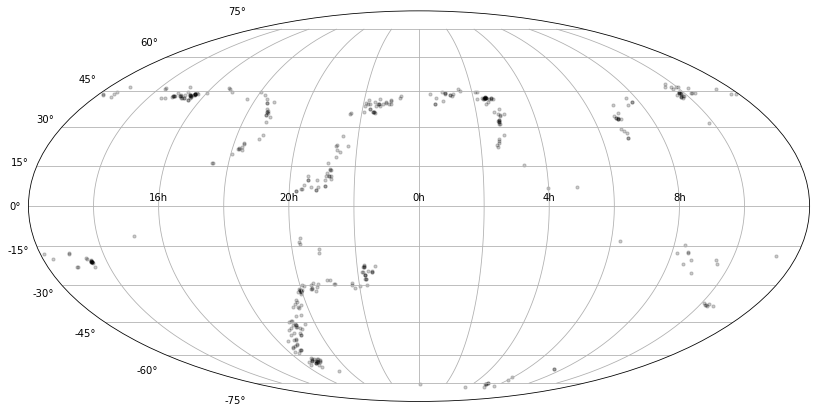

In [50]:
# Plots the skyplot of the new objects
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection="mollweide")
im = ax.scatter(new_coord.ra.wrap_at('180d').radian, new_coord.dec.radian, s= 10, marker='o',c = 'black', alpha =0.2)
ax.set_xticklabels([' ','16h',' ','20h',' ','0h','  ','4h','  ','8h',' '])
ax.grid(True)